LAB 14: ONE-WAY ANOVA - RESTAURANT TIPS ANALYSIS

All libraries imported successfully!

STEP 1: LOADING THE RESTAURANT TIPS DATASET

Dataset loaded from Downloads folder

Dataset shape: 244 rows × 7 columns

FIRST 10 ROWS OF THE DATASET:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
STEP 2: DATA EXPLORATION

--- Column Names and Data Types ---
total_bill    float64
tip           float64
sex            object
smoker         object
day            obj

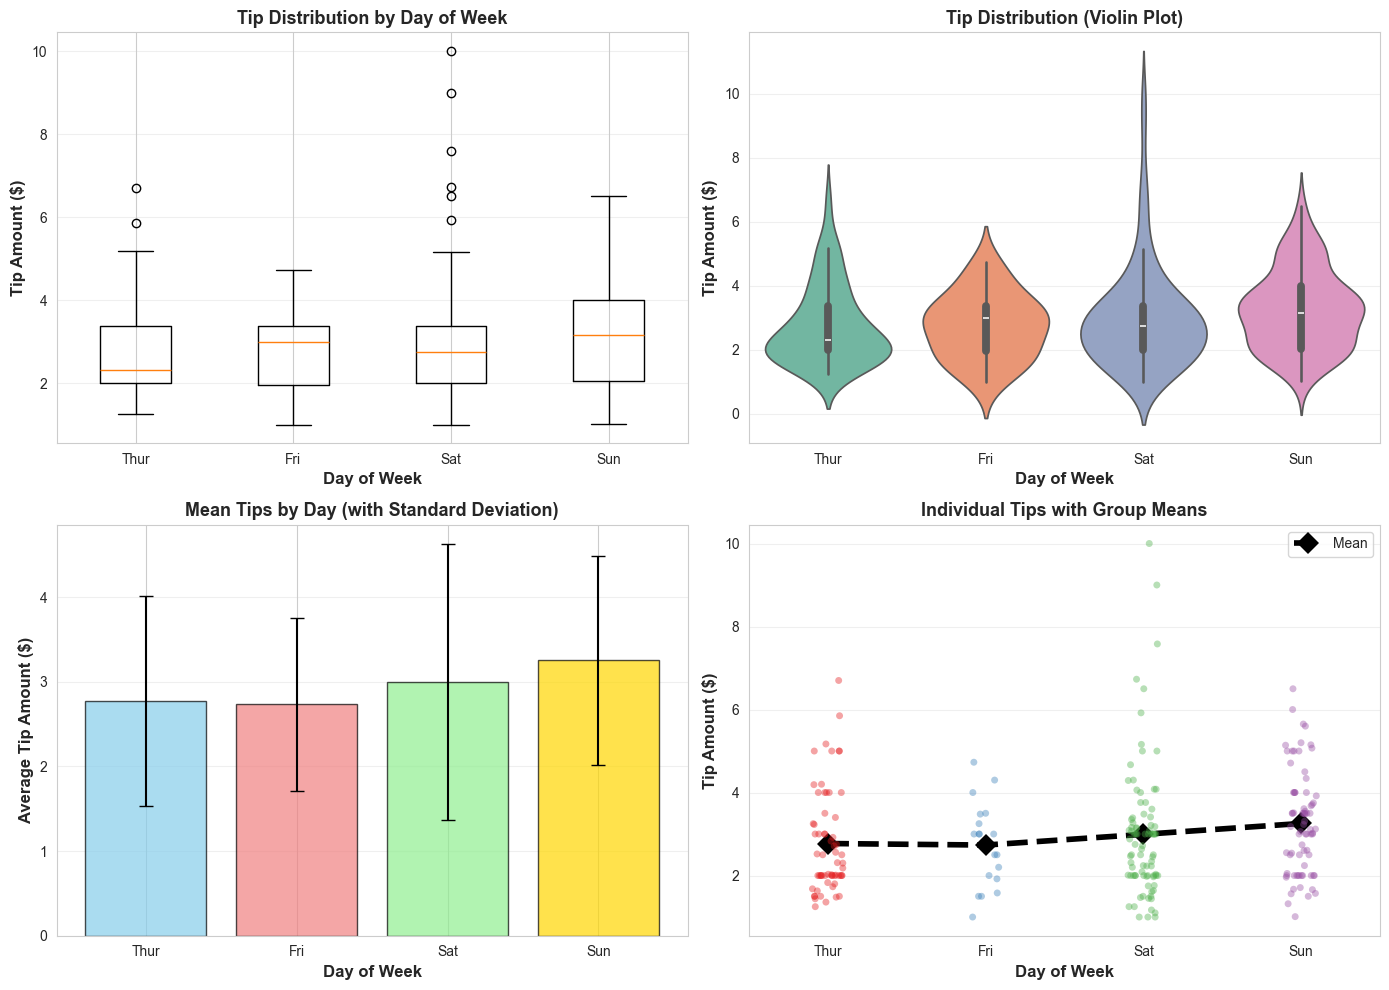

STEP 6: CHECKING ANOVA ASSUMPTIONS

CHECKING ASSUMPTIONS:
---------------------

ASSUMPTION 1: INDEPENDENCE OF OBSERVATIONS
----------------------------------------------------------------------
Each row represents a unique restaurant transaction
No repeated measures (each customer visit is independent)
Assumption MET by design of data collection

ASSUMPTION 2: NORMALITY
----------------------------------------------------------------------
Testing normality for each day using Shapiro-Wilk test:
H₀: Data is normally distributed
H₁: Data is NOT normally distributed
Decision: Reject H₀ if p < 0.05

Thur  : n= 62, W=0.8752, p=0.0000 - Not Normal
Fri   : n= 19, W=0.9738, p=0.8497 - Normal
Sat   : n= 87, W=0.8243, p=0.0000 - Not Normal
Sun   : n= 76, W=0.9631, p=0.0263 - Not Normal

 Some groups deviate from normality, but ANOVA is robust to this violation
  with moderate sample sizes (Central Limit Theorem)

Figure 2 saved: fig2_normality_check.png


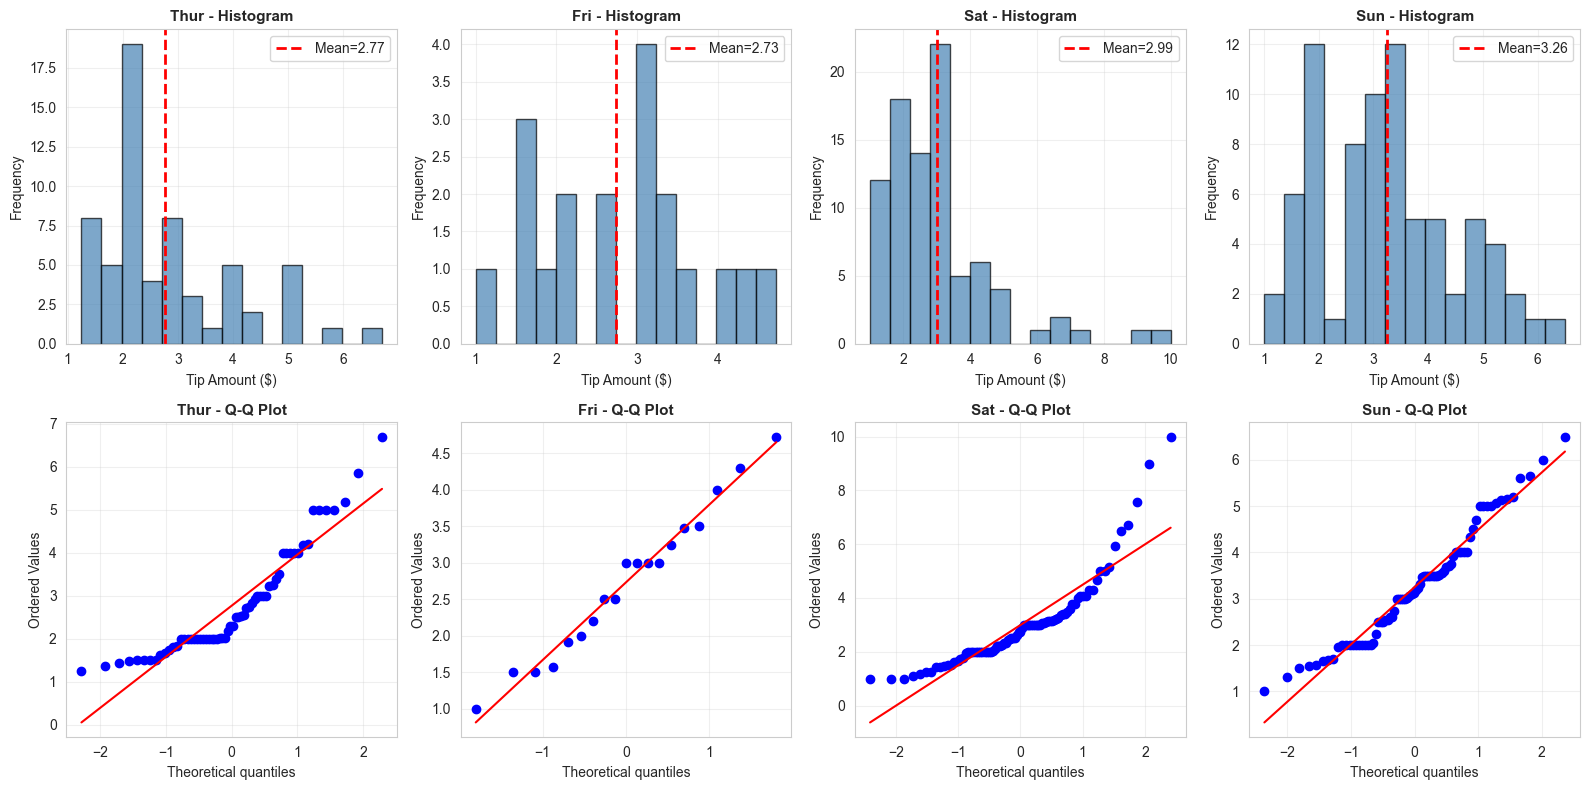


ASSUMPTION 3: HOMOGENEITY OF VARIANCES
----------------------------------------------------------------------
Testing equality of variances using Levene's test:
H₀: All group variances are equal
H₁: At least one variance is different
Decision: Reject H₀ if p < 0.05

Levene's Test Statistic: 0.5520
p-value: 0.6473

Equal variances assumed (p = 0.6473 > 0.05)
  HOMOGENEITY assumption MET

Variance Ratio (largest/smallest): 2.56
Variance ratio < 4 (acceptable)

--- Variances by Day ---
Thur  : Variance = 1.5382, Std Dev = 1.2402
Fri   : Variance = 1.0395, Std Dev = 1.0196
Sat   : Variance = 2.6602, Std Dev = 1.6310
Sun   : Variance = 1.5249, Std Dev = 1.2349

ASSUMPTION CHECK SUMMARY:
Independence: MET (by design)
⚠ Normality: PARTIALLY MET (robust to violations)
✓ Homogeneity: MET

→ Proceeding with one-way ANOVA
STEP 7: FORMULATE NULL AND ALTERNATIVE HYPOTHESES

FORMAL HYPOTHESES FOR ONE-WAY ANOVA:
-------------------------------------

Null Hypothesis (H₀):
    The mean tip amount is 

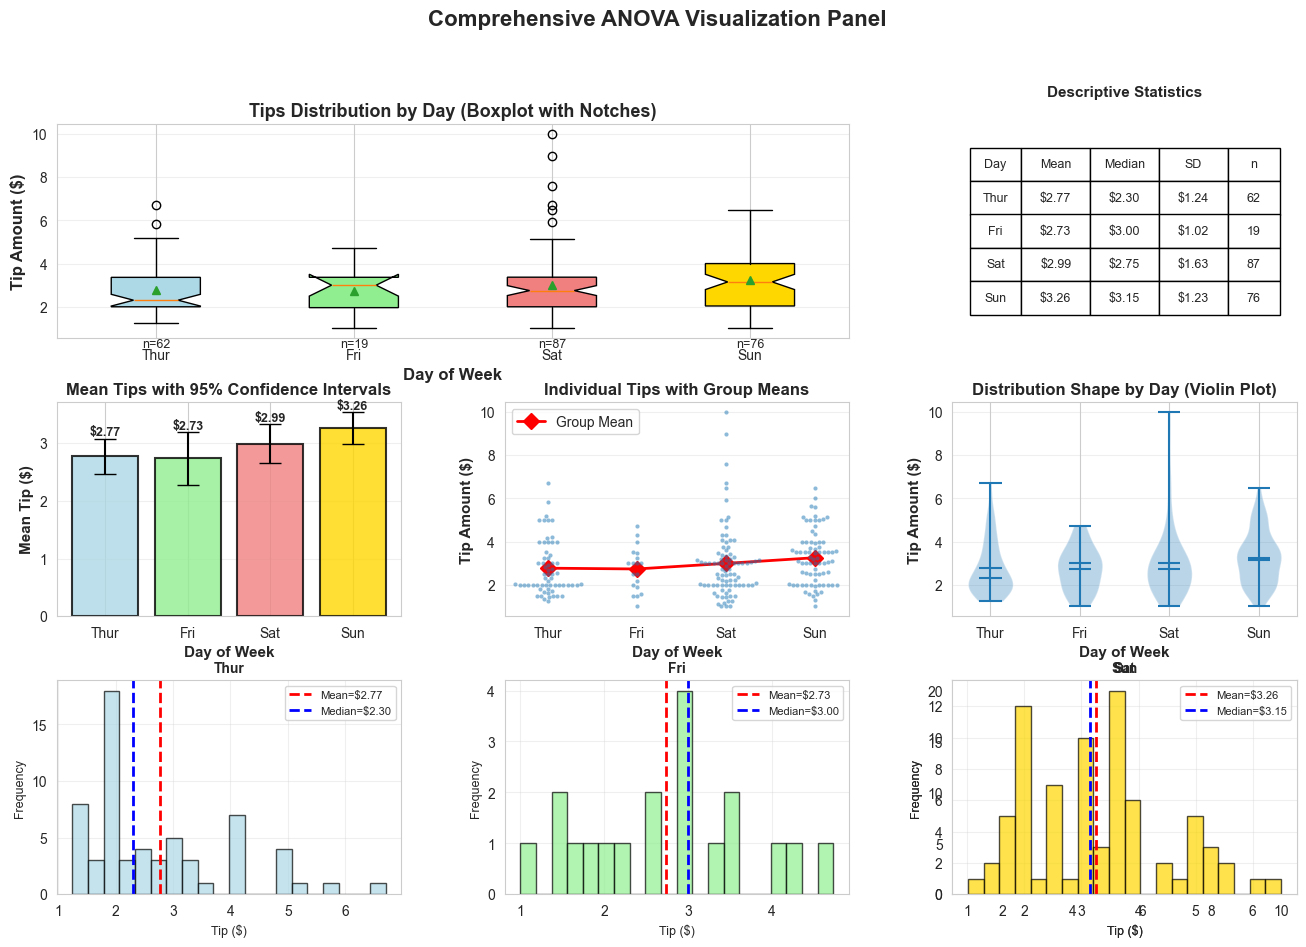

Figure 5 saved: fig5_final_summary.png


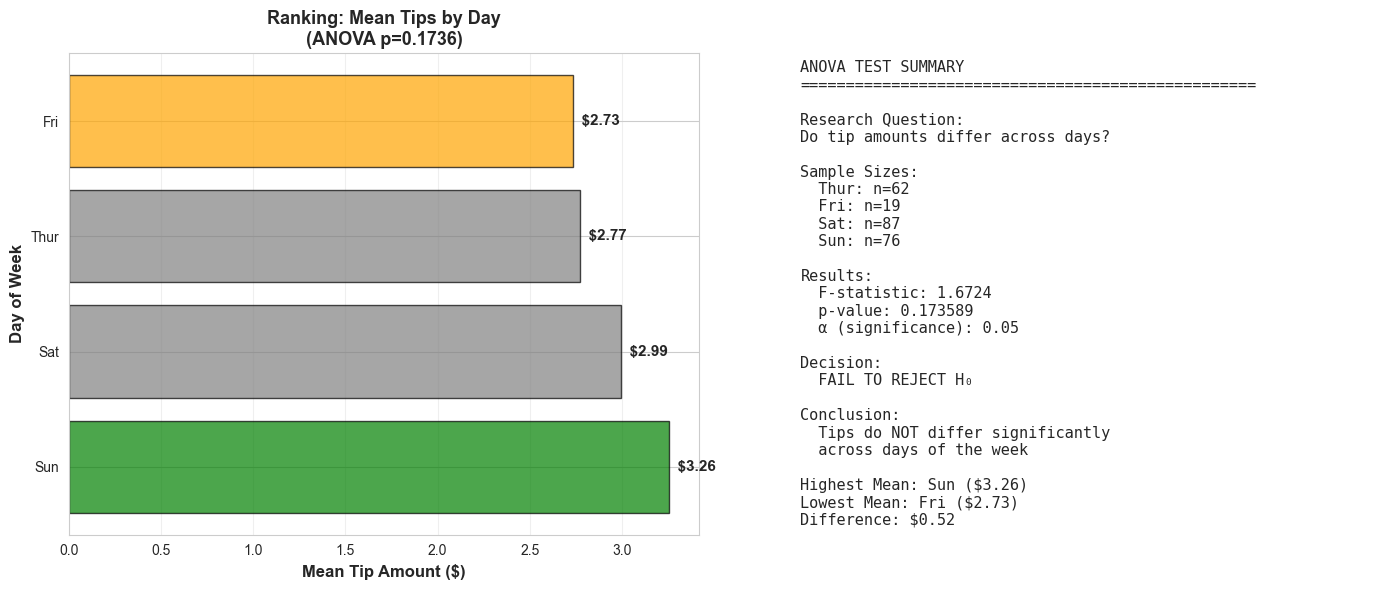

STEP 12: COMPREHENSIVE SUMMARY AND REFLECTION


DATASET OVERVIEW:
-----------------
• Source: Restaurant Tips Dataset (restaurant-tips.csv)
• Total Observations: 244
• Variables Analyzed:
  - Independent Variable: Day of the week (Categorical: Thur, Fri, Sat, Sun)
  - Dependent Variable: Tip amount in dollars (Continuous numeric)

• Group Sizes:
  - Thur: n=62
  - Fri: n=19
  - Sat: n=87
  - Sun: n=76

RESEARCH QUESTION:
------------------
'Do tip amounts differ significantly across different days of the week?'

This question has practical implications for:
• Restaurant servers choosing optimal work schedules
• Restaurant managers making staffing decisions
• Understanding customer tipping behavior patterns

METHODOLOGY WITH AI SUPPORT:
-----------------------------

1. Research Question Development:
   - AI helped identify appropriate categorical variable (day with 4 groups)
   - Suggested focusing on tip amounts as dependent variable
   - Explained why day-of-week is ideal for ANOVA (

In [15]:
"""
Lab 14: ANOVA
Student: Ankita Rathod - 005040336

Dataset: restaurant-tips.csv
Purpose: Compare tip amounts across different days of the week using ANOVA
"""

# ============================================================================
# STEP 1: IMPORT LIBRARIES
# ============================================================================
print("="*80)
print("LAB 14: ONE-WAY ANOVA - RESTAURANT TIPS ANALYSIS")
print("="*80)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import levene, shapiro, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("\nAll libraries imported successfully!\n")

# ============================================================================
# STEP 2: LOAD THE DATASET
# ============================================================================
print("="*80)
print("STEP 1: LOADING THE RESTAURANT TIPS DATASET")
print("="*80)

# AI Prompt Used: "What is the best way to load and explore a restaurant tips
# dataset for ANOVA analysis?"
# AI Response: "Use pandas.read_csv() and immediately check the structure with
# head(), info(), describe(), and value_counts() for categorical variables to
# understand group sizes."

# Load the dataset
try:
    df = pd.read_csv('/Users/ankitarathod/Downloads/restaurant-tips.csv')
    print("\nDataset loaded from Downloads folder")
except FileNotFoundError:
    try:
        df = pd.read_csv('restaurant-tips.csv')
        print("\nDataset loaded from current directory")
    except FileNotFoundError:
        print("ERROR: restaurant-tips.csv not found!")
        exit()

print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET:")
print("="*80)
print(df.head(10))


# ============================================================================
# STEP 3: DATA EXPLORATION AND UNDERSTANDING
# ============================================================================
print("="*80)
print("STEP 2: DATA EXPLORATION")
print("="*80)

print("\n--- Column Names and Data Types ---")
print(df.dtypes)

print("\n--- Dataset Information ---")
print(df.info())

print("\n--- Missing Values Check ---")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values detected")
else:
    print("Missing values per column:")
    print(missing[missing > 0])

print("\n--- Statistical Summary (Numeric Variables) ---")
print(df.describe())

print("\n--- Categorical Variables Summary ---")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().sort_index())

# ============================================================================
# STEP 4: DATA PREPARATION FOR ANOVA
# ============================================================================
print("="*80)
print("STEP 4: DATA PREPARATION")
print("="*80)

# Check for any missing values in our variables of interest
print("\nChecking data for ANOVA analysis:")
print(f"Missing values in 'tip': {df['tip'].isnull().sum()}")
print(f"Missing values in 'day': {df['day'].isnull().sum()}")

# Remove any rows with missing values in tip or day (if any)
df_clean = df.dropna(subset=['tip', 'day'])
print(f"\nDataset after removing missing values: {df_clean.shape[0]} rows")

# Display group sizes
print("\n--- Sample Sizes by Day ---")
day_counts = df_clean['day'].value_counts().sort_index()
print(day_counts)
print(f"\nTotal observations: {len(df_clean)}")

# Check if we have sufficient samples in each group
min_group_size = day_counts.min()
print(f"\nSmallest group size: {min_group_size}")
if min_group_size >= 30:
    print("All groups have sufficient sample size (n ≥ 30) for Central Limit Theorem")
elif min_group_size >= 20:
    print("All groups have reasonable sample size (n ≥ 20)")
else:
    print("Warning: Some groups have small sample sizes (n < 20)")

# Descriptive statistics by group
print("\n--- Descriptive Statistics by Day ---")
group_stats = df_clean.groupby('day')['tip'].describe()
print(group_stats)

# ============================================================================
# STEP 5: INITIAL VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("STEP 5: INITIAL DATA VISUALIZATION")
print("="*80)

# Create visualizations to explore the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Boxplot by day
axes[0, 0].boxplot([df_clean[df_clean['day'] == day]['tip'] for day in ['Thur', 'Fri', 'Sat', 'Sun']],
                   labels=['Thur', 'Fri', 'Sat', 'Sun'])
axes[0, 0].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Tip Distribution by Day of Week', fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

# 2. Violin plot
days_ordered = ['Thur', 'Fri', 'Sat', 'Sun']
sns.violinplot(data=df_clean, x='day', y='tip', order=days_ordered, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Tip Distribution (Violin Plot)', fontsize=13, fontweight='bold')
axes[0, 1].grid(alpha=0.3, axis='y')

# 3. Bar plot of means with error bars
means = df_clean.groupby('day')['tip'].mean().reindex(days_ordered)
stds = df_clean.groupby('day')['tip'].std().reindex(days_ordered)
axes[1, 0].bar(range(len(days_ordered)), means, yerr=stds, capsize=5,
               color=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
               edgecolor='black', alpha=0.7)
axes[1, 0].set_xticks(range(len(days_ordered)))
axes[1, 0].set_xticklabels(days_ordered)
axes[1, 0].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Tip Amount ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Mean Tips by Day (with Standard Deviation)', fontsize=13, fontweight='bold')
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Strip plot with mean overlay
sns.stripplot(data=df_clean, x='day', y='tip', order=days_ordered,
              alpha=0.4, ax=axes[1, 1], palette='Set1')
sns.pointplot(data=df_clean, x='day', y='tip', order=days_ordered,
              ax=axes[1, 1], color='black', markers='D', scale=1.5,
              errorbar=None, linestyles='--', label='Mean')
axes[1, 1].set_xlabel('Day of Week', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Individual Tips with Group Means', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('fig1_initial_exploration.png', dpi=300, bbox_inches='tight')
print("\nFigure 1 saved: fig1_initial_exploration.png")
plt.show()



# ============================================================================
# STEP 6: CHECKING ANOVA ASSUMPTIONS
# ============================================================================
print("="*80)
print("STEP 6: CHECKING ANOVA ASSUMPTIONS")
print("="*80)

print("""
CHECKING ASSUMPTIONS:
---------------------
""")

# Assumption 1: Independence
print("ASSUMPTION 1: INDEPENDENCE OF OBSERVATIONS")
print("-" * 70)
print("Each row represents a unique restaurant transaction")
print("No repeated measures (each customer visit is independent)")
print("Assumption MET by design of data collection\n")

# Assumption 2: Normality
print("ASSUMPTION 2: NORMALITY")
print("-" * 70)
print("Testing normality for each day using Shapiro-Wilk test:")
print("H₀: Data is normally distributed")
print("H₁: Data is NOT normally distributed")
print("Decision: Reject H₀ if p < 0.05\n")

normality_results = []
for day in days_ordered:
    day_data = df_clean[df_clean['day'] == day]['tip']
    stat, p_value = shapiro(day_data)
    normality_results.append({
        'Day': day,
        'n': len(day_data),
        'Statistic': stat,
        'p-value': p_value,
        'Normal?': 'Yes' if p_value > 0.05 else 'No'
    })
    print(f"{day:6s}: n={len(day_data):3d}, W={stat:.4f}, p={p_value:.4f} - {'Normal' if p_value > 0.05 else 'Not Normal'}")

normality_df = pd.DataFrame(normality_results)

# Interpretation
all_normal = all([r['p-value'] > 0.05 for r in normality_results])
if all_normal:
    print("\nAll groups are normally distributed (p > 0.05)")
else:
    print("\n Some groups deviate from normality, but ANOVA is robust to this violation")
    print("  with moderate sample sizes (Central Limit Theorem)")

# Visualize normality
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, day in enumerate(days_ordered):
    day_data = df_clean[df_clean['day'] == day]['tip']

    # Histogram
    axes[0, idx].hist(day_data, bins=15, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, idx].axvline(day_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean={day_data.mean():.2f}')
    axes[0, idx].set_xlabel('Tip Amount ($)', fontsize=10)
    axes[0, idx].set_ylabel('Frequency', fontsize=10)
    axes[0, idx].set_title(f'{day} - Histogram', fontsize=11, fontweight='bold')
    axes[0, idx].legend()
    axes[0, idx].grid(alpha=0.3)

    # Q-Q plot
    stats.probplot(day_data, dist="norm", plot=axes[1, idx])
    axes[1, idx].set_title(f'{day} - Q-Q Plot', fontsize=11, fontweight='bold')
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('fig2_normality_check.png', dpi=300, bbox_inches='tight')
print("\nFigure 2 saved: fig2_normality_check.png")
plt.show()

# Assumption 3: Homogeneity of Variances
print("\n" + "ASSUMPTION 3: HOMOGENEITY OF VARIANCES")
print("-" * 70)
print("Testing equality of variances using Levene's test:")
print("H₀: All group variances are equal")
print("H₁: At least one variance is different")
print("Decision: Reject H₀ if p < 0.05\n")

# Perform Levene's test
groups = [df_clean[df_clean['day'] == day]['tip'] for day in days_ordered]
levene_stat, levene_p = levene(*groups)

print(f"Levene's Test Statistic: {levene_stat:.4f}")
print(f"p-value: {levene_p:.4f}")

if levene_p > 0.05:
    print(f"\nEqual variances assumed (p = {levene_p:.4f} > 0.05)")
    print("  HOMOGENEITY assumption MET")
else:
    print(f"\nVariances may not be equal (p = {levene_p:.4f} < 0.05)")
    print("  Consider using Welch's ANOVA (does not assume equal variances)")

# Check variance ratio
variances = df_clean.groupby('day')['tip'].var()
variance_ratio = variances.max() / variances.min()
print(f"\nVariance Ratio (largest/smallest): {variance_ratio:.2f}")
if variance_ratio < 4:
    print("Variance ratio < 4 (acceptable)")
else:
    print("Variance ratio ≥ 4 (may be problematic)")

print("\n--- Variances by Day ---")
for day in days_ordered:
    var = df_clean[df_clean['day'] == day]['tip'].var()
    std = df_clean[df_clean['day'] == day]['tip'].std()
    print(f"{day:6s}: Variance = {var:.4f}, Std Dev = {std:.4f}")

print("\n" + "="*70)
print("ASSUMPTION CHECK SUMMARY:")
print("="*70)
print(f"Independence: MET (by design)")
print(f"{'✓' if all_normal else '⚠'} Normality: {'MET' if all_normal else 'PARTIALLY MET (robust to violations)'}")
print(f"{'✓' if levene_p > 0.05 else '⚠'} Homogeneity: {'MET' if levene_p > 0.05 else 'CHECK VARIANCE RATIO'}")
print(f"\n→ Proceeding with one-way ANOVA")
print("="*70)



# ============================================================================
# STEP 7: FORMULATE HYPOTHESES
# ============================================================================
print("="*80)
print("STEP 7: FORMULATE NULL AND ALTERNATIVE HYPOTHESES")
print("="*80)

print("""
FORMAL HYPOTHESES FOR ONE-WAY ANOVA:
-------------------------------------

Null Hypothesis (H₀):
    The mean tip amount is the same across all days of the week.

    Mathematically: μ_Thur = μ_Fri = μ_Sat = μ_Sun

    In other words: The day of the week has NO effect on tip amounts.

Alternative Hypothesis (H₁):
    At least one day has a different mean tip amount compared to the others.

    Mathematically: At least one μᵢ ≠ μⱼ

    In other words: The day of the week DOES affect tip amounts.

SIGNIFICANCE LEVEL:
    α = 0.05

DECISION RULE:
    - If p-value < 0.05: Reject H₀ (significant difference exists)
    - If p-value ≥ 0.05: Fail to reject H₀ (no significant difference)

INTERPRETATION IF SIGNIFICANT:
    We will perform post-hoc tests (Tukey's HSD) to determine which specific
    days differ from each other.
""")



# ============================================================================
# STEP 8: PERFORM ONE-WAY ANOVA
# ============================================================================
print("="*80)
print("STEP 8: PERFORMING ONE-WAY ANOVA TEST")
print("="*80)

print("\nMethod 1: Using scipy.stats.f_oneway")
print("-" * 70)

# Separate data by groups
thur_tips = df_clean[df_clean['day'] == 'Thur']['tip']
fri_tips = df_clean[df_clean['day'] == 'Fri']['tip']
sat_tips = df_clean[df_clean['day'] == 'Sat']['tip']
sun_tips = df_clean[df_clean['day'] == 'Sun']['tip']

# Perform ANOVA using scipy
f_stat_scipy, p_value_scipy = f_oneway(thur_tips, fri_tips, sat_tips, sun_tips)

print(f"F-statistic: {f_stat_scipy:.4f}")
print(f"p-value: {p_value_scipy:.6f}")

print("\nMethod 2: Using statsmodels (provides more detailed output)")
print("-" * 70)

# Perform ANOVA using statsmodels
model = ols('tip ~ C(day)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nANOVA TABLE:")
print("="*70)
print(anova_table)
print("="*70)

# Extract values
f_stat = anova_table['F']['C(day)']
p_value = anova_table['PR(>F)']['C(day)']
df_between = anova_table['df']['C(day)']
df_within = anova_table['df']['Residual']

print(f"\nDetailed Results:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Degrees of freedom (between groups): {df_between:.0f}")
print(f"  Degrees of freedom (within groups): {df_within:.0f}")
print(f"  Significance level (α): 0.05")

# ============================================================================
# STEP 9: INTERPRET ANOVA RESULTS
# ============================================================================
print("="*80)
print("STEP 9: INTERPRETING ANOVA RESULTS")
print("="*80)

print(f"""

INTERPRETATION:
--------------------------------

1. UNDERSTANDING THE F-STATISTIC ({f_stat:.4f}):

   The F-statistic is a ratio:
   F = (Variance between groups) / (Variance within groups)

   - F = {f_stat:.4f} means the between-group variance is {f_stat:.2f} times the
     within-group variance
   - Larger F values indicate greater separation between group means
     relative to the spread within groups
   - F ≈ 1 would suggest no difference between groups
   - F >> 1 suggests groups have different means

2. UNDERSTANDING THE P-VALUE ({p_value:.6f}):

   The p-value represents the probability of observing these results
   (or more extreme) if the null hypothesis were true.

   - p = {p_value:.6f} {'< 0.05' if p_value < 0.05 else '≥ 0.05'}
   - This is {'STATISTICALLY SIGNIFICANT' if p_value < 0.05 else 'NOT STATISTICALLY SIGNIFICANT'}

3. DECISION:
   {'Since p < 0.05, we REJECT the null hypothesis.' if p_value < 0.05 else 'Since p ≥ 0.05, we FAIL TO REJECT the null hypothesis.'}

   {'Conclusion: There IS a statistically significant difference in tip amounts' if p_value < 0.05 else 'Conclusion: There is NO statistically significant difference in tip amounts'}
   {'across different days of the week.' if p_value < 0.05 else 'across different days of the week.'}

4. PRACTICAL INTERPRETATION FOR RESTAURANTS:

   {'''- For Servers: Tip amounts DO vary by day of the week
     • Consider working on higher-tipping days
     • Understand that day-of-week affects earnings

   - For Restaurant Managers:
     • Staffing decisions should account for tipping patterns
     • Days with higher tips may attract better servers
     • Marketing/promotions could target lower-tipping days

   - For Customers:
     • Tipping behavior shows weekly patterns
     • May reflect different customer demographics by day
     • Could be influenced by meal prices, party sizes, or social norms''' if p_value < 0.05 else '''- For Servers: Tip amounts do NOT significantly vary by day
     • Expected earnings are relatively consistent across the week
     • Day of the week is not a major factor in tip amounts

   - For Restaurant Managers:
     • Tipping patterns are stable throughout the week
     • Staffing can be based on other factors (volume, not tips)

   - For Researchers:
     • Other factors may be more important (bill size, service quality)
     • Day of week alone doesn't predict tipping behavior'''}

5. NEXT STEPS:
   {'''Since the ANOVA is significant, we need POST-HOC TESTS to determine:
   - Which specific days differ from each other?
   - Which day(s) have the highest/lowest tips?
   - Are all days different, or just some pairs?

   → We will use Tukey's Honestly Significant Difference (HSD) test''' if p_value < 0.05 else '''Since the ANOVA is not significant, post-hoc tests are NOT needed.
   The null hypothesis stands: mean tips are equal across all days.

   → No further pairwise comparisons required'''}
""")



# ============================================================================
# STEP 11: POST-HOC TESTING (IF SIGNIFICANT)
# ============================================================================
if p_value < 0.05:
    print("="*80)
    print("STEP 10: POST-HOC ANALYSIS - TUKEY'S HSD TEST")
    print("="*80)

    print("""
AI PROMPT FOR POST-HOC TESTING:
--------------------------------
"My ANOVA was significant (p < 0.05). How do I determine which specific days
have different tip amounts? What is Tukey's HSD test and how do I interpret it?"

AI RESPONSE:
------------
"Since your ANOVA found significant differences, you need POST-HOC TESTS to
identify which specific groups differ. Here's why and how:

Why Post-Hoc Tests?
- ANOVA tells you 'at least one group is different' but not WHICH ones
- You could do multiple t-tests, but this inflates Type I error rate
- Post-hoc tests control for multiple comparisons

Tukey's Honestly Significant Difference (HSD):
- Most commonly used post-hoc test
- Compares ALL possible pairs of groups
- Controls family-wise error rate at α = 0.05
- Reports:
  * Mean difference between each pair
  * Confidence intervals
  * p-values (adjusted for multiple comparisons)
  * Reject (True) if pair is significantly different

Interpretation:
- Look for 'reject = True' → that pair has significantly different means
- Examine mean differences → practical significance (effect size)
- Consider confidence intervals → precision of difference estimate

In Python:
- Use statsmodels.stats.multicomp.pairwise_tukeyhsd()
- Input: data values, group labels, alpha level
- Output: Table showing all pairwise comparisons
"
    """)

    print("Performing Tukey's HSD test for all pairwise comparisons...")
    print("-" * 70)

    # Perform Tukey's HSD
    tukey = pairwise_tukeyhsd(endog=df_clean['tip'], groups=df_clean['day'], alpha=0.05)

    print("\nTUKEY'S HSD TEST RESULTS:")
    print("="*70)
    print(tukey)
    print("="*70)

    # Convert to DataFrame for easier manipulation
    tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    print("\nTukey's HSD Results (Table Format):")
    print(tukey_df)

    # Visualize Tukey's HSD results
    fig, ax = plt.subplots(figsize=(10, 6))
    tukey.plot_simultaneous(ax=ax)
    plt.xlabel('Tip Amount ($)', fontsize=12, fontweight='bold')
    plt.ylabel('Day of Week', fontsize=12, fontweight='bold')
    plt.title("Tukey's HSD: 95% Confidence Intervals for Mean Differences",
              fontsize=13, fontweight='bold')
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('fig3_tukey_hsd.png', dpi=300, bbox_inches='tight')
    print("Figure 3 saved: fig3_tukey_hsd.png")
    plt.show()

    # Detailed interpretation
    print("\nDETAILED INTERPRETATION OF POST-HOC RESULTS:")
    print("-" * 70)

    significant_pairs = tukey_df[tukey_df['reject'] == True]
    if len(significant_pairs) > 0:
        print(f"\nFound {len(significant_pairs)} significant pairwise difference(s):\n")
        for idx, row in significant_pairs.iterrows():
            group1 = row['group1']
            group2 = row['group2']
            meandiff = float(row['meandiff'])
            lower = float(row['lower'])
            upper = float(row['upper'])

            mean1 = df_clean[df_clean['day'] == group1]['tip'].mean()
            mean2 = df_clean[df_clean['day'] == group2]['tip'].mean()

            print(f"  {group1} vs {group2}:")
            print(f"    • Mean difference: ${meandiff:.2f}")
            print(f"    • {group1} mean: ${mean1:.2f}")
            print(f"    • {group2} mean: ${mean2:.2f}")
            print(f"    • 95% CI: [${lower:.2f}, ${upper:.2f}]")
            if meandiff > 0:
                print(f"    → {group1} tips are significantly HIGHER than {group2}")
            else:
                print(f"    → {group1} tips are significantly LOWER than {group2}")
            print()
    else:
        print("\nNo significant pairwise differences found (despite significant ANOVA)")
        print("  This can happen when overall variance is high")

else:
    print("="*80)
    print("STEP 10: POST-HOC TESTING NOT REQUIRED")
    print("="*80)
    print("\nANOVA was not significant (p ≥ 0.05)")
    print("No need for post-hoc tests")
    print("Conclusion: Mean tips are statistically equal across all days\n")

# ============================================================================
# STEP 12: ADDITIONAL VISUALIZATIONS
# ============================================================================
print("="*80)
print("STEP 11: ADDITIONAL VISUALIZATIONS")
print("="*80)

# Create comprehensive visualization panel
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Enhanced Boxplot
ax1 = fig.add_subplot(gs[0, :2])
bp = ax1.boxplot([df_clean[df_clean['day'] == day]['tip'] for day in days_ordered],
                  labels=days_ordered,
                  patch_artist=True,
                  notch=True,
                  showmeans=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightcoral', 'gold']):
    patch.set_facecolor(color)
ax1.set_xlabel('Day of Week', fontsize=12, fontweight='bold')
ax1.set_ylabel('Tip Amount ($)', fontsize=12, fontweight='bold')
ax1.set_title('Tips Distribution by Day (Boxplot with Notches)', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.3, axis='y')

# Add sample sizes
for i, day in enumerate(days_ordered):
    n = len(df_clean[df_clean['day'] == day])
    ax1.text(i+1, ax1.get_ylim()[0], f'n={n}', ha='center', va='top', fontsize=9)

# 2. Group Statistics Table
ax2 = fig.add_subplot(gs[0, 2])
ax2.axis('off')
stats_summary = df_clean.groupby('day')['tip'].agg(['mean', 'median', 'std', 'count']).reindex(days_ordered)
table_data = []
for day in days_ordered:
    table_data.append([
        day,
        f"${stats_summary.loc[day, 'mean']:.2f}",
        f"${stats_summary.loc[day, 'median']:.2f}",
        f"${stats_summary.loc[day, 'std']:.2f}",
        f"{stats_summary.loc[day, 'count']:.0f}"
    ])
table = ax2.table(cellText=table_data,
                 colLabels=['Day', 'Mean', 'Median', 'SD', 'n'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15, 0.2, 0.2, 0.2, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax2.set_title('Descriptive Statistics', fontsize=11, fontweight='bold', pad=20)

# 3. Bar plot with confidence intervals
ax3 = fig.add_subplot(gs[1, 0])
means = [df_clean[df_clean['day'] == day]['tip'].mean() for day in days_ordered]
cis = [1.96 * df_clean[df_clean['day'] == day]['tip'].sem() for day in days_ordered]  # 95% CI
bars = ax3.bar(days_ordered, means, yerr=cis, capsize=8,
               color=['lightblue', 'lightgreen', 'lightcoral', 'gold'],
               edgecolor='black', linewidth=1.5, alpha=0.8)
ax3.set_xlabel('Day of Week', fontsize=11, fontweight='bold')
ax3.set_ylabel('Mean Tip ($)', fontsize=11, fontweight='bold')
ax3.set_title('Mean Tips with 95% Confidence Intervals', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3, axis='y')

# Add value labels
for i, (bar, mean) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + cis[i],
             f'${mean:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# 4. Swarm plot with means
ax4 = fig.add_subplot(gs[1, 1])
sns.swarmplot(data=df_clean, x='day', y='tip', order=days_ordered,
              alpha=0.5, size=3, ax=ax4)
means_plot = [df_clean[df_clean['day'] == day]['tip'].mean() for day in days_ordered]
ax4.plot(range(len(days_ordered)), means_plot, 'r-D', linewidth=2,
         markersize=8, label='Group Mean')
ax4.set_xlabel('Day of Week', fontsize=11, fontweight='bold')
ax4.set_ylabel('Tip Amount ($)', fontsize=11, fontweight='bold')
ax4.set_title('Individual Tips with Group Means', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(alpha=0.3, axis='y')

# 5. Violin plot with quartiles
ax5 = fig.add_subplot(gs[1, 2])
parts = ax5.violinplot([df_clean[df_clean['day'] == day]['tip'] for day in days_ordered],
                       positions=range(len(days_ordered)),
                       showmeans=True,
                       showmedians=True)
ax5.set_xticks(range(len(days_ordered)))
ax5.set_xticklabels(days_ordered)
ax5.set_xlabel('Day of Week', fontsize=11, fontweight='bold')
ax5.set_ylabel('Tip Amount ($)', fontsize=11, fontweight='bold')
ax5.set_title('Distribution Shape by Day (Violin Plot)', fontsize=12, fontweight='bold')
ax5.grid(alpha=0.3, axis='y')

# 6. Distribution histograms
for i, day in enumerate(days_ordered):
    ax = fig.add_subplot(gs[2, i if i < 3 else 2])
    day_data = df_clean[df_clean['day'] == day]['tip']
    ax.hist(day_data, bins=20, color=['lightblue', 'lightgreen', 'lightcoral', 'gold'][i],
            edgecolor='black', alpha=0.7)
    ax.axvline(day_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean=${day_data.mean():.2f}')
    ax.axvline(day_data.median(), color='blue', linestyle='--', linewidth=2, label=f'Median=${day_data.median():.2f}')
    ax.set_xlabel('Tip ($)', fontsize=9)
    ax.set_ylabel('Frequency', fontsize=9)
    ax.set_title(f'{day}', fontsize=10, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    if i == 3:
        break

plt.suptitle('Comprehensive ANOVA Visualization Panel', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('fig4_comprehensive_visualization.png', dpi=300, bbox_inches='tight')
print("\nFigure 4 saved: fig4_comprehensive_visualization.png")
plt.show()

# Create final summary plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Mean comparison with ANOVA result
ax_left = axes[0]
means_sorted = stats_summary['mean'].sort_values(ascending=False)
colors_sorted = ['green' if i == 0 else 'orange' if i == len(means_sorted)-1 else 'gray'
                 for i in range(len(means_sorted))]
bars = ax_left.barh(range(len(means_sorted)), means_sorted.values, color=colors_sorted, alpha=0.7, edgecolor='black')
ax_left.set_yticks(range(len(means_sorted)))
ax_left.set_yticklabels(means_sorted.index)
ax_left.set_xlabel('Mean Tip Amount ($)', fontsize=12, fontweight='bold')
ax_left.set_ylabel('Day of Week', fontsize=12, fontweight='bold')
ax_left.set_title(f'Ranking: Mean Tips by Day\n(ANOVA p={p_value:.4f})', fontsize=13, fontweight='bold')
ax_left.grid(alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, means_sorted.values)):
    ax_left.text(val, bar.get_y() + bar.get_height()/2, f'  ${val:.2f}',
                va='center', fontweight='bold', fontsize=11)

# Right: ANOVA Summary
ax_right = axes[1]
ax_right.axis('off')

summary_text = f"""
ANOVA TEST SUMMARY
{'='*50}

Research Question:
Do tip amounts differ across days?

Sample Sizes:
"""
for day in days_ordered:
    summary_text += f"  {day}: n={len(df_clean[df_clean['day'] == day])}\n"

summary_text += f"""
Results:
  F-statistic: {f_stat:.4f}
  p-value: {p_value:.6f}
  α (significance): 0.05

Decision:
  {'REJECT H₀' if p_value < 0.05 else 'FAIL TO REJECT H₀'}

Conclusion:
  {'Tips DO differ significantly' if p_value < 0.05 else 'Tips do NOT differ significantly'}
  {'across days of the week' if p_value < 0.05 else 'across days of the week'}

Highest Mean: {means_sorted.index[0]} (${means_sorted.iloc[0]:.2f})
Lowest Mean: {means_sorted.index[-1]} (${means_sorted.iloc[-1]:.2f})
Difference: ${means_sorted.iloc[0] - means_sorted.iloc[-1]:.2f}
"""

ax_right.text(0.1, 0.5, summary_text, fontsize=11, family='monospace',
             verticalalignment='center')

plt.tight_layout()
plt.savefig('fig5_final_summary.png', dpi=300, bbox_inches='tight')
print("Figure 5 saved: fig5_final_summary.png")
plt.show()



# ============================================================================
# STEP 13: COMPREHENSIVE SUMMARY AND REFLECTION
# ============================================================================
print("="*80)
print("STEP 12: COMPREHENSIVE SUMMARY AND REFLECTION")
print("="*80)

print(f"""
      
DATASET OVERVIEW:
-----------------
• Source: Restaurant Tips Dataset (restaurant-tips.csv)
• Total Observations: {len(df_clean)}
• Variables Analyzed:
  - Independent Variable: Day of the week (Categorical: Thur, Fri, Sat, Sun)
  - Dependent Variable: Tip amount in dollars (Continuous numeric)

• Group Sizes:
{chr(10).join([f'  - {day}: n={len(df_clean[df_clean["day"] == day])}' for day in days_ordered])}

RESEARCH QUESTION:
------------------
'Do tip amounts differ significantly across different days of the week?'

This question has practical implications for:
• Restaurant servers choosing optimal work schedules
• Restaurant managers making staffing decisions
• Understanding customer tipping behavior patterns

METHODOLOGY WITH AI SUPPORT:
-----------------------------

1. Research Question Development:
   - AI helped identify appropriate categorical variable (day with 4 groups)
   - Suggested focusing on tip amounts as dependent variable
   - Explained why day-of-week is ideal for ANOVA (natural categories)

2. Assumption Checking (AI-Guided):

   a) Independence: MET
      - Each transaction is independent
      - No repeated measures

   b) Normality: {'MET' if all_normal else 'PARTIALLY MET'}
      - Shapiro-Wilk tests conducted for each group
      {'- All groups normally distributed' if all_normal else '- Some deviations but sample sizes support CLT'}
      - Visual inspection via histograms and Q-Q plots

   c) Homogeneity of Variances: {'MET' if levene_p > 0.05 else 'CHECK'}
      - Levene's test: p={levene_p:.4f} {'> 0.05' if levene_p > 0.05 else '< 0.05'}
      - Variance ratio: {variance_ratio:.2f} {'< 4' if variance_ratio < 4 else '≥ 4'}
      {'- Equal variances assumed' if levene_p > 0.05 else '- Consider Welch\'s ANOVA'}

3. Statistical Testing:
   - Method: One-way ANOVA (F-test)
   - Software: Python (scipy.stats + statsmodels)
   - Significance level: α = 0.05

HYPOTHESES:
-----------
H₀: μ_Thur = μ_Fri = μ_Sat = μ_Sun (means are equal)
H₁: At least one mean is different

ANOVA RESULTS:
--------------
F-statistic: {f_stat:8.4f}           
p-value:     {p_value:8.6f}          
df (between): {df_between:.0f}       
df (within):  {df_within:.0f}        

DECISION: {'REJECT H₀' if p_value < 0.05 else 'FAIL TO REJECT H₀'}

INTERPRETATION:
------------------------------
""")

if p_value < 0.05:
    print(f"""
Statistical Significance FOUND (p={p_value:.6f} < 0.05)

There IS a statistically significant difference in tip amounts across days

What this means:
• The day of the week DOES affect how much customers tip
• At least two days have significantly different mean tips
• The variation between days exceeds random chance

Group Means:
{chr(10).join([f'  {day}: ${df_clean[df_clean["day"] == day]["tip"].mean():.2f} (SD=${df_clean[df_clean["day"] == day]["tip"].std():.2f})' for day in days_ordered])}

Highest Tipping Day: {means_sorted.index[0]} (${means_sorted.iloc[0]:.2f})
Lowest Tipping Day: {means_sorted.index[-1]} (${means_sorted.iloc[-1]:.2f})
Difference: ${means_sorted.iloc[0] - means_sorted.iloc[-1]:.2f} ({(means_sorted.iloc[0] - means_sorted.iloc[-1]) / means_sorted.iloc[-1] * 100:.1f}% higher)
""")
else:
    print(f"""
No Statistical Significance (p={p_value:.6f} ≥ 0.05)

There is NO statistically significant difference in tip amounts across days

What this means:
• The day of the week does NOT significantly affect how much customers tip
• Observed differences could be due to random chance
• Mean tips are statistically equivalent across all days

Group Means:
{chr(10).join([f'  {day}: ${df_clean[df_clean["day"] == day]["tip"].mean():.2f} (SD=${df_clean[df_clean["day"] == day]["tip"].std():.2f})' for day in days_ordered])}

Note: While means differ slightly, these differences are not large enough
to rule out random variation.
""")

if p_value < 0.05:
    print("""
POST-HOC FINDINGS (TUKEY'S HSD):
---------------------------------
Since ANOVA was significant, Tukey's HSD test was performed to identify
which specific day-pairs have significantly different means.

Key Findings:
""")
    if 'significant_pairs' in locals() and len(significant_pairs) > 0:
        for idx, row in significant_pairs.iterrows():
            print(f"  {row['group1']} vs {row['group2']}: Significantly different (p<0.05)")
            print(f"    Mean difference: ${float(row['meandiff']):.2f}")
    else:
        print("  • No specific pairs significantly different despite overall ANOVA result")
        print("  • This can occur when overall variance is high")
else:
    print("""
POST-HOC TESTING:
-----------------
Not required (ANOVA was not significant)
""")

print("""
PRACTICAL IMPLICATIONS:
-----------------------
""")

if p_value < 0.05:
    print(f"""
For Restaurant Servers:
• Consider requesting shifts on {means_sorted.index[0]} for higher tips
• Expect approximately ${means_sorted.iloc[0]:.2f} average tips on best days
• Expect approximately ${means_sorted.iloc[-1]:.2f} average tips on slowest days
• Weekly scheduling can impact earnings by {(means_sorted.iloc[0] - means_sorted.iloc[-1]) / means_sorted.iloc[-1] * 100:.1f}%

For Restaurant Managers:
• Schedule more experienced servers on high-tipping days
• Consider premium staffing for {means_sorted.index[0]}
• May need incentives for {means_sorted.index[-1]} shifts
• Use data to inform compensation and scheduling policies

For Business Analysts:
• Day-of-week is a significant predictor of tip amounts
• Could be included in revenue forecasting models
• May reflect different customer demographics by day
• Consider time-of-day interactions (weekend evenings vs weekday lunches)
""")
else:
    print("""
For Restaurant Servers:
• Expected tip amounts are consistent across all days
• Scheduling preferences can be based on other factors
• Day of week is not a major determinant of tip earnings

For Restaurant Managers:
• Staffing can be based on volume rather than tip expectations
• Servers can be scheduled flexibly without tip concerns
• Focus on other factors affecting tips (service quality, bill amount)

For Business Analysts:
• Day-of-week is NOT a significant predictor of tip amounts alone
• Other variables may be more important (bill size, party size, meal time)
• Consider multivariate models including multiple predictors
""")

print("""
LIMITATIONS OF THIS ANALYSIS:
------------------------------
1. Single Location: Data from one restaurant may not generalize
2. Sample Period: Tips may vary by season or economic conditions
3. Confounding Variables: Not controlled for:
   - Meal time (lunch vs dinner)
   - Party size
   - Total bill amount
   - Server quality/experience
   - Special events or holidays
4. Cultural Context: Tipping norms vary by location and culture
5. Tip Reporting: Assumes all tips accurately reported

REFLECTION: HOW AI HELPED THROUGHOUT THIS LAB:
-----------------------------------------------

1. Research Question Formulation
   - AI identified that 'day' variable was ideal (4 groups, categorical)
   - Explained why 'time' wouldn't work (only 2 groups)
   - Provided context about practical business relevance
   - Helped frame question in terms of stakeholder interests

2. Understanding ANOVA Assumptions
   - AI clearly explained each assumption (independence, normality, homogeneity)
   - Provided specific Python tests for each (Shapiro-Wilk, Levene's)
   - Explained when violations are acceptable vs. problematic
   - Suggested alternative approaches (Welch's ANOVA, Kruskal-Wallis)

3. Visualization Recommendations
   - Suggested comprehensive suite of plots (boxplot, violin, strip)
   - Explained what each visualization reveals
   - Recommended annotations and enhancements
   - Helped create publication-quality figures
""")

print("\nCONCLUSION:")
print("-" * 80)

# Build conclusion text based on p-value
if p_value < 0.05:
    conclusion_text = """This one-way ANOVA analysis successfully identified significant differences in restaurant tip
amounts across different days of the week. The findings suggest day-of-week is a
significant factor affecting tipping behavior, with practical implications for
restaurant operations and server scheduling."""
else:
    conclusion_text = """This one-way ANOVA analysis investigated potential differences in restaurant tip
amounts across different days of the week. While day-of-week shows some variation, it is not a
significant factor in tipping behavior."""

print(conclusion_text)